### 3.1.3 Измерение МП Земли

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('n_data_count.txt', sep='\t')
df

,n,T1,T2,T3,T4
0,3,1.132,1.132,1.114,1.100
1,4,1.532,1.450,1.464,1.456
2,5,1.882,1.862,1.820,1.850
3,6,2.188,2.176,2.174,2.130
4,7,2.482,2.470,2.500,2.502
5,8,2.870,2.800,2.890,2.930
6,9,3.170,3.260,3.310,3.160
7,10,3.620,3.500,3.570,3.540
8,11,3.890,3.960,3.970,3.950
9,12,4.320,4.290,4.370,4.270


Коэффиценты прямой: k, s_k, b, s_b
0.3520242424242428	0.0021759989736868644	0.06121818181817895	0.006250081211573324


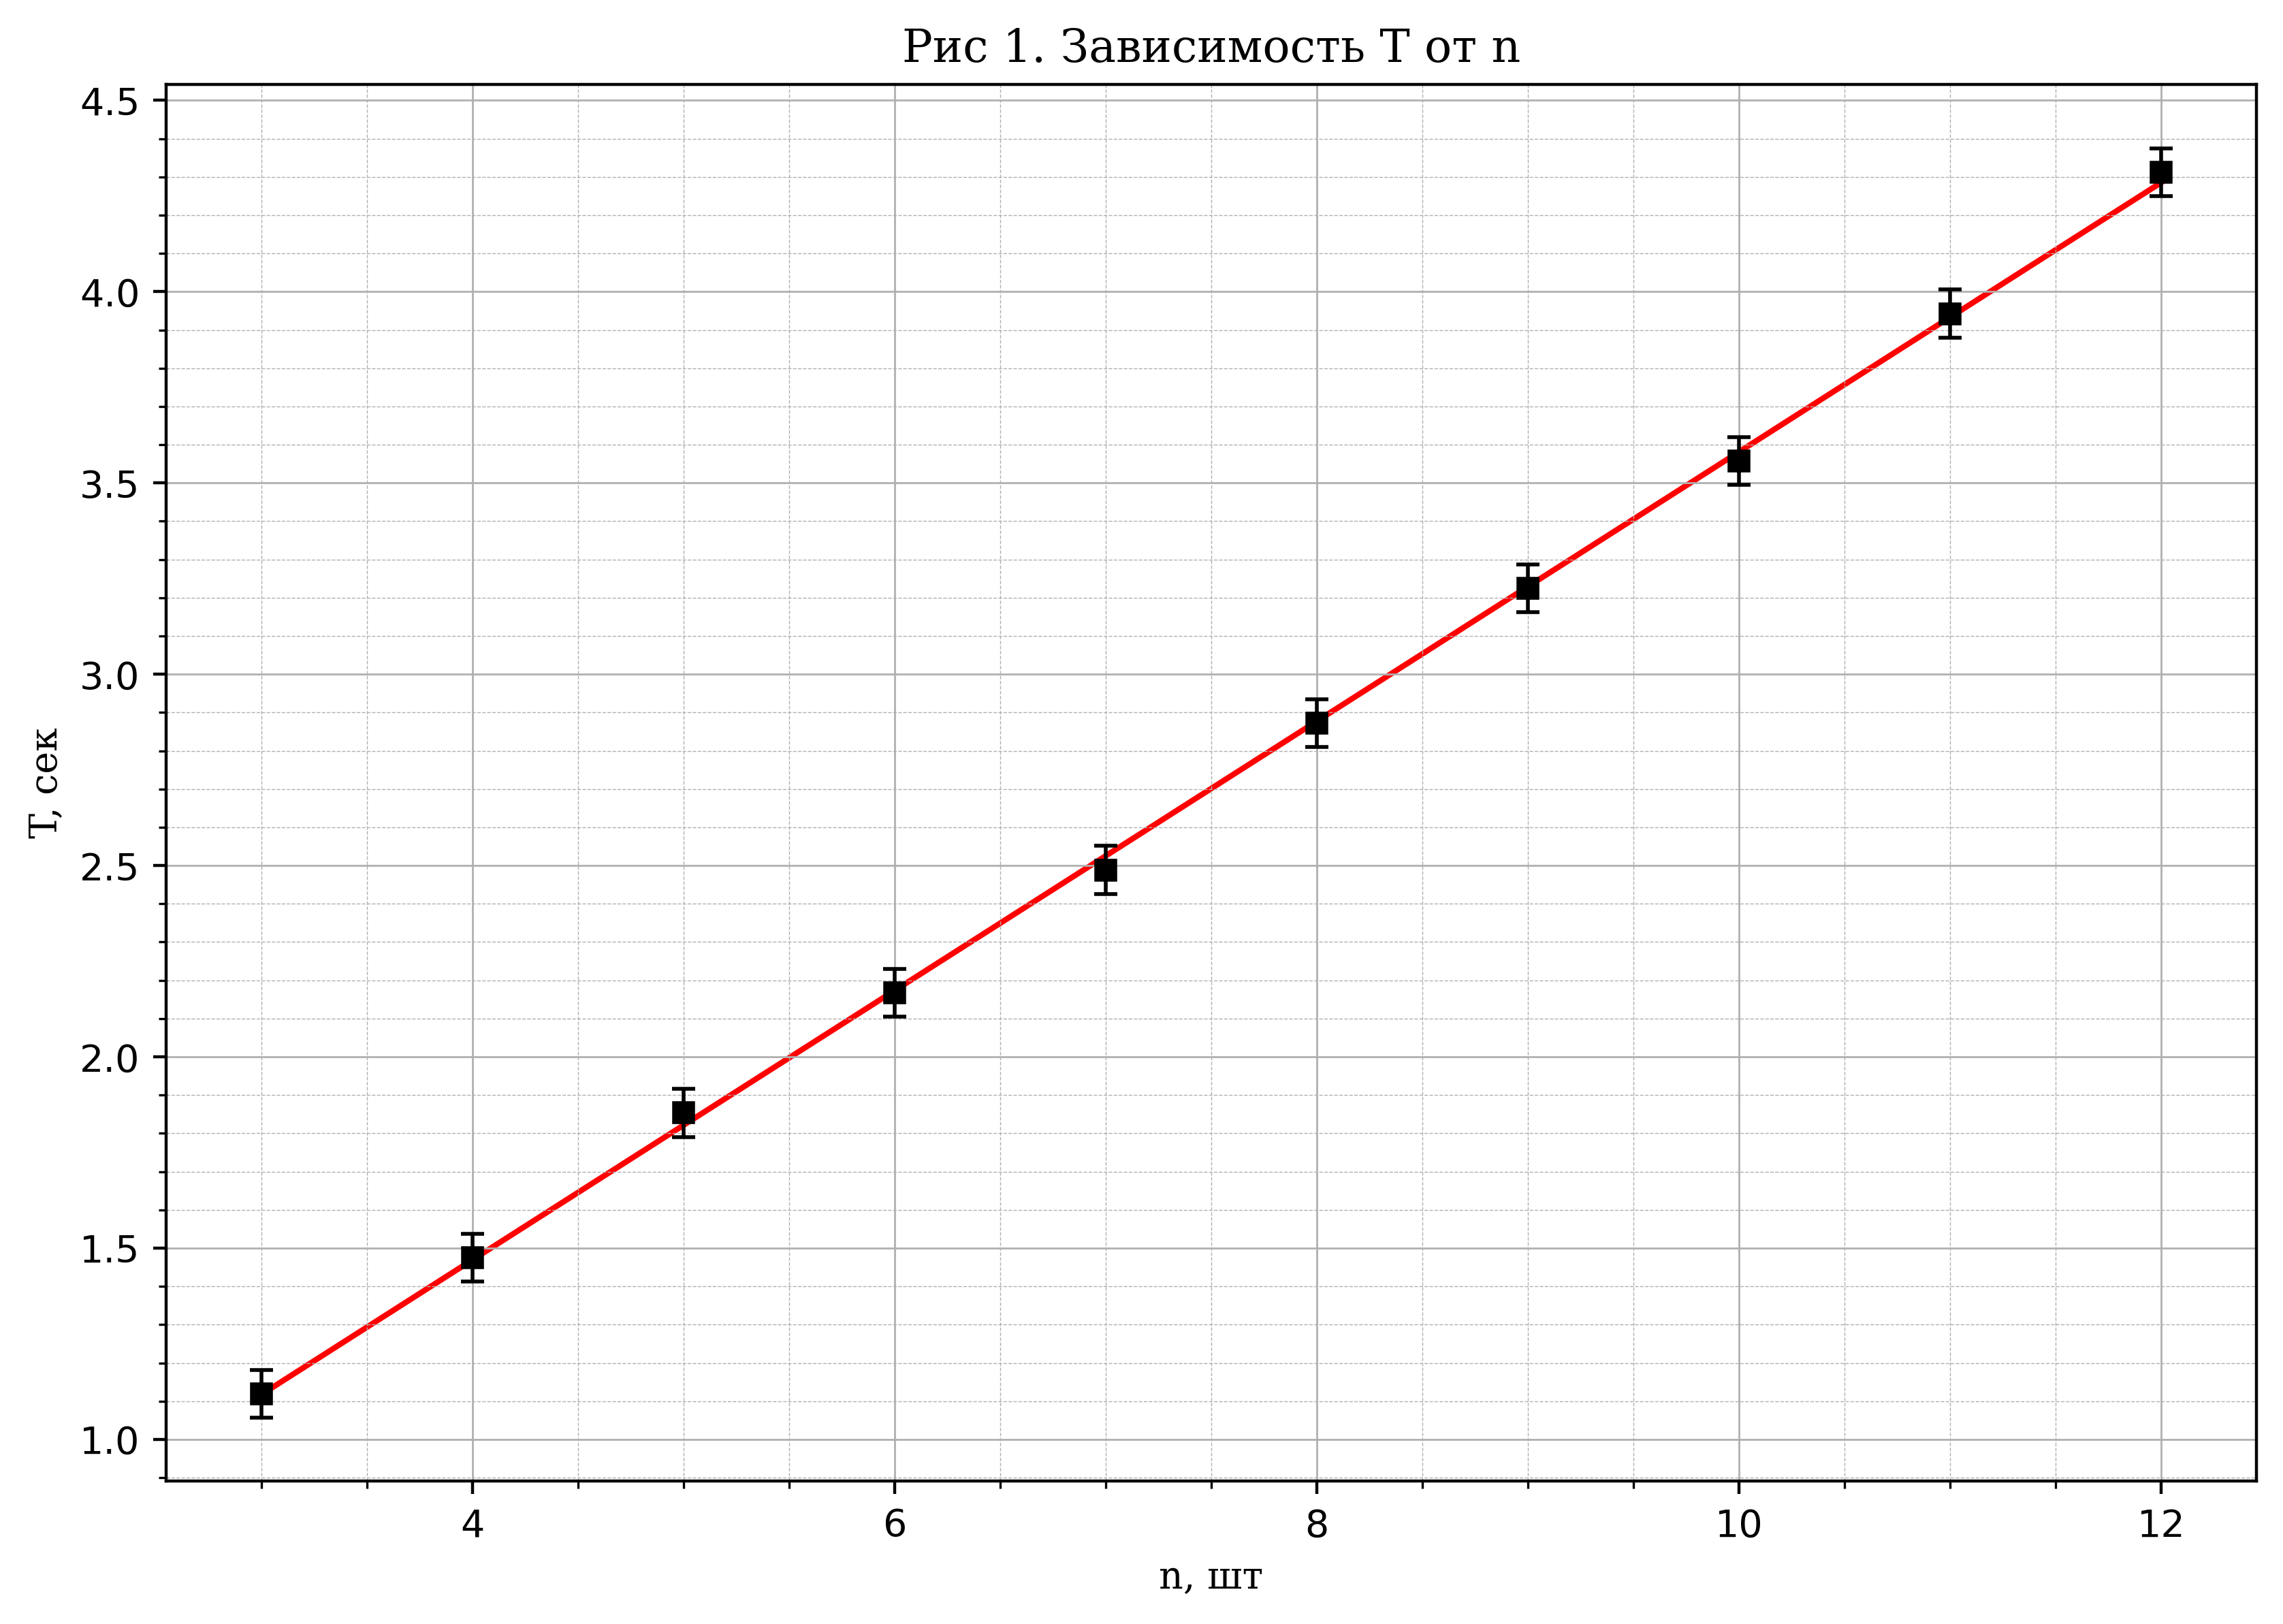

In [2]:
Ts = df[['T1', 'T2', 'T3', 'T4']].mean(axis=1)

import matplotlib.pyplot as plt
import mygraph as mg

fig1 = mg.make_figure(dpi_mode='high')
ax1 = fig1.add_subplot()
mg.set_grids(fig1)
mg.set_title(ax1, 'Зависимость T от n')
mg.set_label(ax1, 'n, шт', 'T, сек')


k, s_k, b, s_b = mg.linls(np.array(df['n']), np.array(Ts))

mg.draw_errorbar(ax1, df['n'], Ts, 
                y_err = max([np.std(df.loc[i, 'T1':'T4']) for i in range(0,10)]))
mg.display_linls(ax1)

In [3]:
# Расчёт погрешностей
sigma_m = np.sqrt(
    np.square( 2 * 2.194 * 0.1 * np.sqrt(1.0357 * 981 / 6) ) +
    np.square( 2.194**2 * np.sqrt(981/6/1.0357) / 2 * 0.002 )
)
sigma_m

5.7104041391929865

In [4]:
d = 0.594
s_d = 0.01
F0 = 286066
s_F0 = 981/1.08*0.002
sigma_m = np.sqrt(
    np.square(2*d*s_d*np.sqrt(F0/6)) +
    np.square(d**2*s_F0/2/np.sqrt(F0*6))
)
sigma_m

2.5940236965463037

In [5]:
m = 1.0357
d = 0.594
Pm = 77.04
B_hor = np.pi**2 * m * d**2 / (3 *k * k * Pm)
B_hor

0.12592847315121178

In [6]:
mm = 62.6
s_mm = 6
s_B = np.sqrt(
    np.square( d**2*0.002/k/k/mm ) +
    np.square( 2*d*m*s_d/k/k/mm ) +
    np.square(2*m*d*d*s_k/k/k/k/mm) +
    np.square(m*d*d*s_mm/k/k/mm/mm)
)
s_B

0.004821721094393174

Коэффиценты прямой: k, s_k, b, s_b
73.52499999999998	4.866601997287332	-218.37999999999982	13.764829094471475


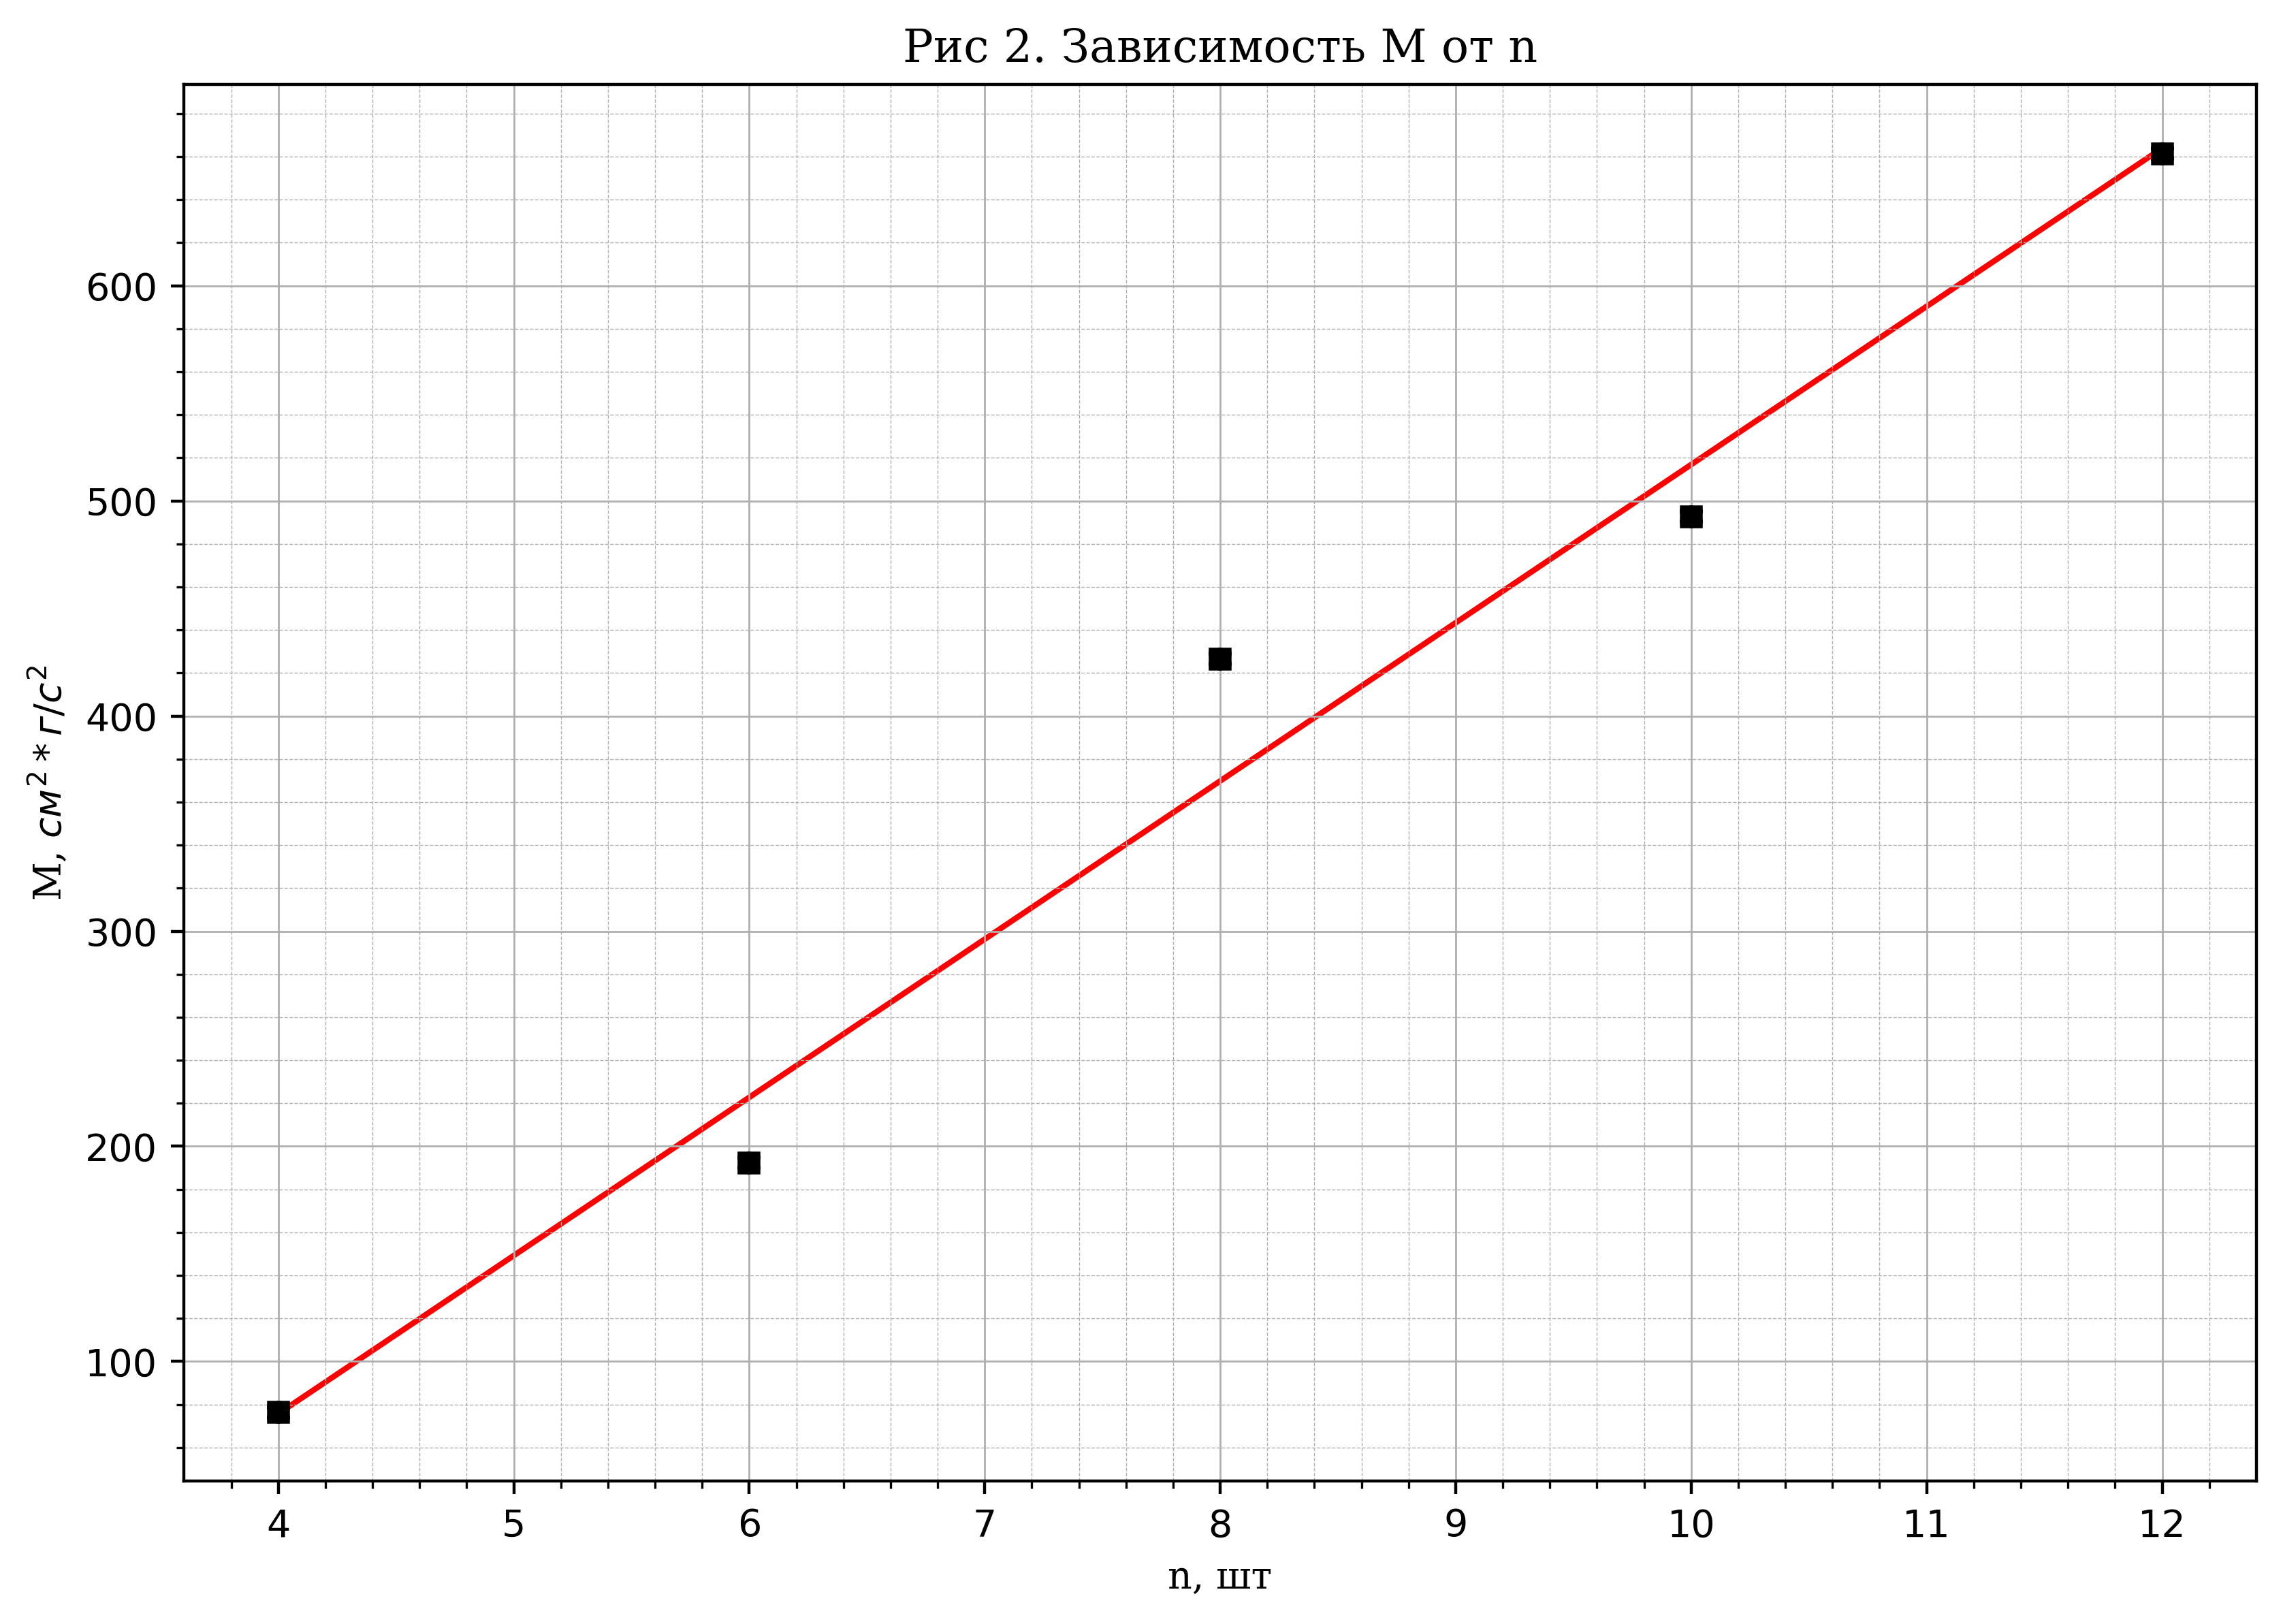

In [7]:
fig2 = mg.make_figure(dpi_mode='high')
ax2 = fig2.add_subplot()
mg.set_grids(fig2)
mg.set_title(ax2, 'Зависимость M от n')
mg.set_label(ax2, 'n, шт', 'M, $см^2*г/с^2$')



M = np.array( [661.4, 492.6, 426.5, 192.3, 76.3] )
n = np.array( [12, 10, 8, 6, 4] )
k, s_k, b, s_b = mg.linls(n, M)

mg.draw_errorbar(ax2, n, M, 
                y_err = 2.4)
mg.display_linls(ax2)

In [8]:
mm = 77.04
s_mm = 6
s_B = np.sqrt(
    np.square( s_k / mm ) +
    np.square( k * s_mm / mm /mm )
)
s_B

0.09754542011113283

In [9]:
0.96*(6400*1000*100)**3/np.sqrt(3*0.83*.83 + 1)

1.4370620093897268e+26